In [1]:
%load_ext tikzmagic
%matplotlib inline

# 확률분포모형을 사용한 확률분포추정

앞서 시각적인 방법을 사용한 확률분포추정 방법을 알아보았다. 시각적인 방법을 사용하게되면 직관적이고 수학을 사용할 필요가 없다는 장점이 있지만 이렇게 구한 확률분포가 가장 그럴듯한 확률분포라는 근거를 댈 수 없다는 단점이 있다. 따라서 이제부터는 수학적인 기준에 따라 가장 올바르다고 생각되는 확률분포를 찾는 방법을 설명한다. 

## 모형

<b>모형(model)</b>은 현실의 부정확한 존재를 가상의 이상적 존재라고 가정하는 것이다. 예를 들어 다음 그림을 보자.

![도형의 모형](model01.png)

이 그림을 보면 모든 사람이 원, 사각형, 삼각형이라고 할 것이다. 하지만 정확한 원, 사각형, 삼각형은 다음과 같은 이상적이고 완벽한 모양을 가져야 한다.

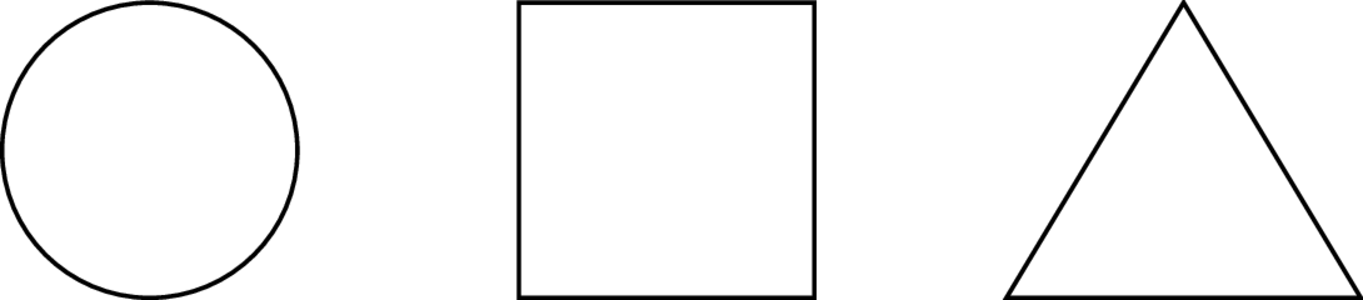

In [2]:
%%tikz -l shapes.symbols -s 1500,300

\draw[black,thick] (0,0) circle (1cm);
\draw[black,thick] (2.5,-1) rectangle (4.5,1);
\draw[black,thick] (5.8,-1)--(7,1)--(8.2,-1)--cycle;

사실은 위 그림도 정확한 원, 사각형, 삼각형은 아니다. 수학적인 원, 사각형, 삼각형에서는 선의 두께가 존재하지 않고 0이기 때문잊다.

이런 식으로 현실에서는 정확하게 표현되지 않는 현실의 존재를 이상적인 수학적 존재라고 가정하는 것을 모형이라고 한다. 

## 확률분포모형

데이터 분석에서도 모형이 많이 사용된다. 수학적인 확률분포추정시에는 우리가 찾고자 하는 확률변수의 확률분포가 미리 정해놓은 특정한 함수 중 하나라고 가정하는데 이렇게 확률분포의 모양을 미리 함수로 정해놓은 것을 <b>확률분포모형(probability distribution model)</b>이라고 한다.

확률분포모형에는 수십가지의 다양한 것이 존재하지만 그 중 가장 기본적인 확률분포는 다음과 같다.

* 범주형 확률분포
  * 베르누이분포 
  * 카테고리분포
  * 이항분포
* 수치형 확률분포
  * 정규분포
  * 스튜던트t분포
  * 로그정규분포

다음 그림은 위 기본 확률분포모형의 대략적인 분포 모양을 그린 것이다. 

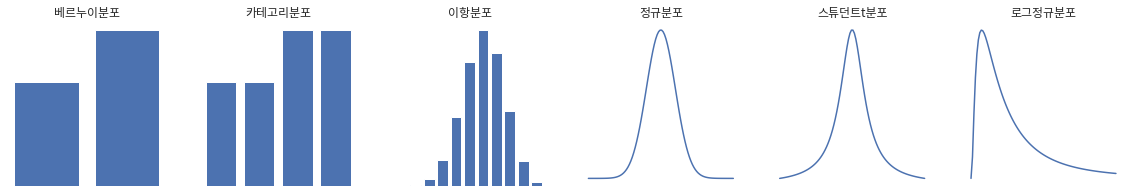

In [3]:
import numpy as np
import scipy as sp

plt.figure(figsize=(20, 3))

plt.subplot(1,6,1)
xx = [0, 1]
plt.bar(xx, sp.stats.bernoulli(0.6).pmf(xx))
plt.title("베르누이분포")
plt.axis('off')

plt.subplot(1,6,2)
xx = np.arange(1, 5)
plt.bar(xx, sp.stats.multinomial(1, [0.2, 0.2, 0.3, 0.3]).pmf(np.eye(4)))
plt.title("카테고리분포")
plt.axis('off')

plt.subplot(1,6,3)
xx = np.arange(0, 11)
plt.bar(xx, sp.stats.binom(10, 0.6).pmf(xx))
plt.title("이항분포")
plt.axis('off')

plt.subplot(1,6,4)
xx = np.linspace(-5, 5, 100)
plt.plot(xx, sp.stats.norm().pdf(xx))
plt.title("정규분포")
plt.axis('off')

plt.subplot(1,6,5)
xx = np.linspace(-5, 5, 100)
plt.plot(xx, sp.stats.t(1).pdf(xx))
plt.title("스튜던트t분포")
plt.axis('off')

plt.subplot(1,6,6)
xx = np.linspace(0.001, 5, 100)
plt.plot(xx, sp.stats.lognorm(1).pdf(xx))
plt.title("로그정규분포")
plt.axis('off')

plt.show()

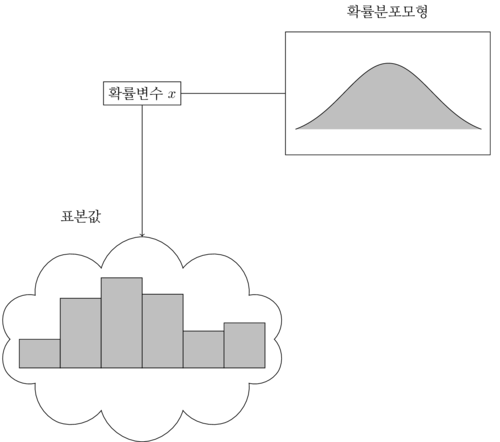

In [4]:
%%tikz -l shapes.symbols -p pgfplots,kotex -e utf-8 -s 500,500

\node[draw] (v) at (0,6) {확률변수 $x$};
\node[draw, cloud, minimum height=5cm, minimum width=7cm] (d) at (0,0) {};
\draw[->] (v) -- (d);
\node () at (-1.5,3) {표본값};

\node[draw, minimum height=3cm, minimum width=5cm] (pd) at (6,6) {};
\node () at (6,8) {확률분포모형};
\draw (v) -- (pd);

\begin{axis}[hide axis,at={(435,1100)},width=200,height=100]
\addplot[domain=-3e-3:3e-3,samples=201,fill=lightgray]{exp(-x^2 / (2e-3^2)) / (1e-3 * sqrt(2*pi))};
\end{axis}

\draw[fill=lightgray] (-3,-0.7) rectangle (-2,0);
\draw[fill=lightgray] (-2,-0.7) rectangle (-1,1);
\draw[fill=lightgray] (-1,-0.7) rectangle (0,1.5);
\draw[fill=lightgray] (0,-0.7) rectangle (1,1.1);
\draw[fill=lightgray] (1,-0.7) rectangle (2,0.2);
\draw[fill=lightgray] (2,-0.7) rectangle (3,0.4);

예를 들어 팁 데이터에서 total_bill 확률변수가 로그정규분포라고 가정한다고하자. 

이 말의 의미는 total_bill 확률변수의 표본데이터는 실제로는 다음과 같지만

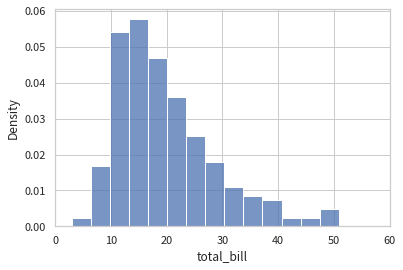

In [5]:
import seaborn as sns

tips = sns.load_dataset("tips")

sns.histplot(x="total_bill", data=tips, stat="density")
plt.xlim(0, 60)
plt.show()

total_bill 확률변수의 확률분포는 원래 다음과 같은 로그정규분포를 따른다고 보는 것이다.

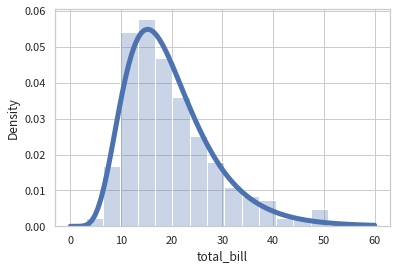

In [6]:
s, loc, scale = sp.stats.lognorm.fit(tips["total_bill"])

fig, ax = plt.subplots()
sns.histplot(x="total_bill", data=tips, stat="density", alpha=0.3, ax=ax)
xx = np.linspace(0, 60, 100)
ax.plot(xx, sp.stats.lognorm.pdf(xx, s, loc, scale), lw=5)
plt.show()

## 확률분포모형의 수식과 모수

확률분포모형의 공통점은 확률질량함수(pmf)나 확률밀도함수(pdf)가 정확한 수식으로 표현된다는 점이다. 이 수식에는 확률변수가 가질 수 있는 값을 나타내는 $x$라는 기호이외에 몇가지 상수기호가 있는데 이 상수기호들을 <b>모수(parameter)</b>라고 부른다. 확률분포모형의 가장 큰 특징은 이 모수의 값만 알고 있으면 정확히 같은 확률분포함수를 재현할 수 있다는 점이다. 

위에서 제시한 기본 확률분포모형의 수식과 모수는 다음과 같다. 

| 분포 | 수식 | 모수 |
|-|-|-|
| 베르누이분포 | $ \text{Bern}(x;\mu) = \mu^x(1-\mu)^{1-x} $ | $\mu$ |
| 카테고리분포 | $ \text{Cat}(x;\mu_1, \ldots, \mu_K) = \prod_{k=1}^K \mu_k^{x_k} $ | $\mu_1,\ldots,\mu_K$ |
| 이항분포 | $ \text{Bin}(x;\mu, N) = \binom N x \; \mu^x(1-\mu)^{N-x} $ | $\mu$, $N$ |
| 정규분포 | $ \mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $ | $\mu$ |
| 스튜던트t분포 | $ t(x;\mu, \lambda, \nu) = \frac{\sqrt{\lambda}}{\sqrt{\nu\pi}}\frac{\Gamma\left(\frac{\nu+1}{2}\right)} {\Gamma\left(\frac{\nu}{2}\right)} \left(1+\lambda\frac{(x-\mu)^2}{\nu} \right)^{-\frac{\nu+1}{2}} $ | $\mu, \lambda, \nu$ |


## 베르누이분포

## 카테고리분포

## 이항분포

## 정규분포

## 스튜던트t분포